In [1]:
import pints
import pints.toy
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
model = pints.toy.FitzhughNagumoModel()

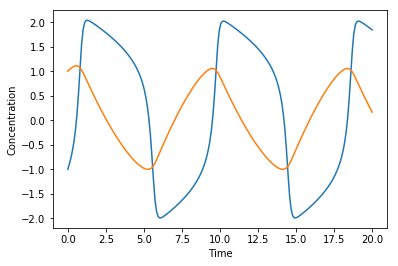

In [20]:
# Run the same simulation using our new model wrapper
times = np.linspace(0, 20, 200)
values = model.simulate([0.1, 0.1, 3], times)

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.plot(times, values)


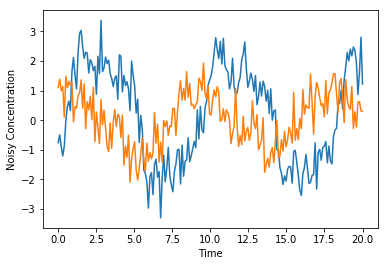

In [3]:
# Define the 'true' parameters
true_parameters = [0.1, 0.1, 3.]

# Run a simulation to get test data
values = model.simulate(true_parameters, times)

# Add some noise
sigma = 0.5
values = values + np.random.randn(values.shape[0],values.shape[1])*sigma

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Noisy Concentration')
plt.plot(times, values)

In [4]:
# Create an object with links to the model and time series
problem = pints.MultiSeriesProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

Minimising error measure
using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 7
Iter. Eval. Best      Time m:s
0     7      809.6972   0:00.1
1     14     809.6972   0:00.1
2     21     317.2232   0:00.2
3     28     317.2232   0:00.2
20    147    106.0097   0:01.1
40    287    102.8089   0:02.6
60    427    102.8019   0:04.0
80    567    102.8019   0:05.5
100   707    102.8019   0:06.9
120   847    102.8019   0:08.4
140   987    102.8019   0:09.8
160   1127   102.8019   0:11.3
180   1267   102.8019   0:12.8
200   1407   102.8019   0:14.3
220   1547   102.8019   0:15.7
240   1687   102.8019   0:17.2
260   1827   102.8019   0:18.7
280   1967   102.8019   0:20.1
300   2107   102.8019   0:21.6
320   2247   102.8019   0:23.1
340   2387   102.8019   0:24.6
351   2457   102.8019   0:25.3
Halting: No significant change for 200 iterations.
Score at true solution:
103.300833473
Found solution:          True parameters:
 1.02449940468033449e

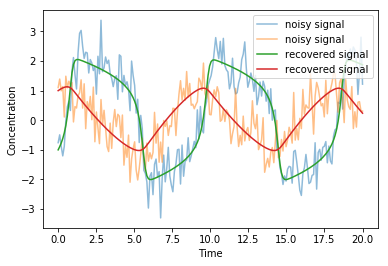

In [5]:
boundaries = pints.Boundaries([0., 0., 0.], [10., 10., 10.])

# Select a starting point
x0 = [1, 1, 1]

# Perform an optimization
found_parameters, found_value = pints.optimise(score, x0, boundaries=boundaries)
print('Score at true solution:')
print(score(true_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(true_parameters[k]))

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.plot(times, values, alpha=0.5, label='noisy signal')
plt.plot(times, problem.evaluate(found_parameters), label='recovered signal')
plt.legend()
plt.show()

In [6]:
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0, 0, 0, 0, 0],
    [2, 2, 10, 2, 2]
)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

In [7]:
found_parameters = np.hstack((found_parameters, sigma, sigma))

In [8]:
# Choose starting points for 3 mcmc chains
xs = [
    found_parameters * 1.1,
    found_parameters * 0.9,
    found_parameters * 1.15,
]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_posterior, 3, xs, method=pints.AdaptiveCovarianceMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Start adapting after 1000 iterations
mcmc.set_adaptation_free_iterations(1000)

# Disable verbose mode
#mcmc.set_log_to_screen(False)

True

In [9]:
# Run!
print('Running...')
chains = mcmc.run()
print('Done!')


Running...
Using Adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.5       0         0.5        0:00.1
2     9      0.333     0         0.667      0:00.1
3     12     0.25      0         0.75       0:00.1
20    63     0.238     0.143     0.381      0:00.7
40    123    0.122     0.122     0.195122   0:01.3
60    183    0.082     0.082     0.147541   0:01.9
80    243    0.0617    0.0617    0.111      0:02.6
100   303    0.0495    0.0495    0.0891     0:03.2
120   363    0.0413    0.0413    0.0744     0:03.8
140   423    0.0355    0.0426    0.0638     0:04.4
160   483    0.0311    0.0559    0.0621     0:05.0
180   543    0.0276    0.0497    0.0552     0:05.7
200   603    0.0249    0.0498    0.0547     0:06.3
220   663    0.0271    0.0452    0.0498     0:07.0
240   723    0.0249    0.0415    0.0456     0:07.6
260   783    0.0268    0.0383    0.0421   

3100  9303   0.189     0.194     0.197      1:33.2
3120  9363   0.19      0.194     0.196091   1:33.7
3140  9423   0.192     0.196     0.197071   1:34.2
3160  9483   0.192     0.196     0.198355   1:34.6
3180  9543   0.193     0.197     0.198994   1:35.2
3200  9603   0.193     0.197     0.199      1:35.7
3220  9663   0.193     0.197     0.199317   1:36.2
3240  9723   0.194     0.198     0.2        1:36.7
3260  9783   0.195     0.198     0.201      1:37.2
3280  9843   0.197     0.198     0.202      1:37.8
3300  9903   0.196     0.199     0.201757   1:38.2
3320  9963   0.195122  0.2       0.203      1:38.7
3340  10023  0.195     0.2       0.203      1:39.2
3360  10083  0.196     0.199643  0.204      1:39.7
3380  10143  0.197     0.199     0.205      1:40.2
3400  10203  0.198     0.201     0.205      1:40.8
3420  10263  0.197603  0.202     0.204      1:41.3
3440  10323  0.2       0.204     0.205      1:41.8
3460  10383  0.200809  0.205     0.205      1:42.4
3480  10443  0.201     0.205   

R-hat:
[1.0086938122676565, 1.053871269863238, 1.0005462658546149, 1.0123183446557249, 1.0056958286465372]


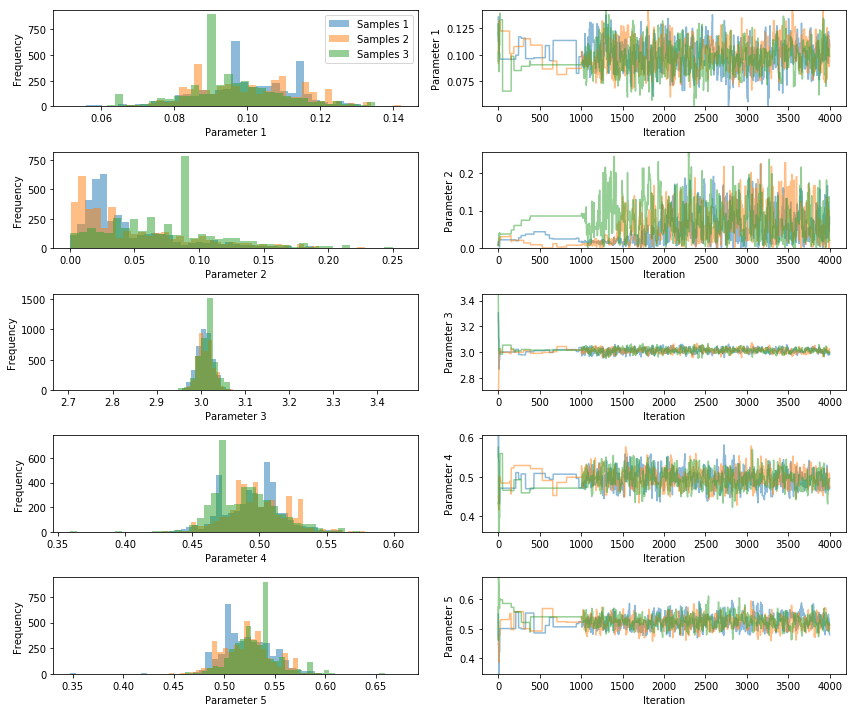

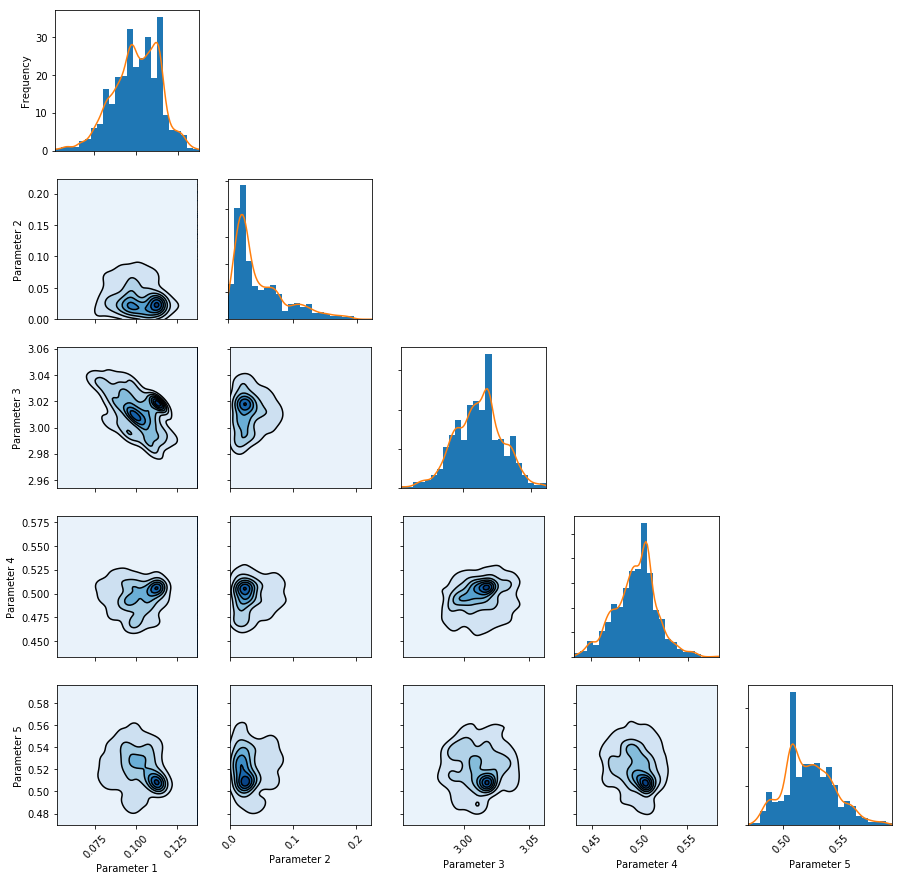

In [10]:
import pints.plot
# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 500:, :]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()